<a href="https://colab.research.google.com/github/MallyRust/ML-Projects/blob/project3/Project_3_due.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tasks

The Titanic dataset describes passengers of the most famous and ill fortuned ship "Titanic". You task is to predict whether a particular passenger would survive. The dependent variable "Survived" is binary. Each of the text comments that some of the sub tasks require should not be more than 150 words.

Your project's grade breakdown is the following:

- Build a correlation matrix and comment it. What is a correlation? How can you describe the relationships you see? (10%)
- Use IV for feature selection. What is IV? Can we use IV for regression tasks? Can we use IV for feature selection when the dependent variable has more than 2 classes? (20%)
- Calculate WoE bins for each feature. What is WoE? Comment on the bins produced by your code? In what cases would you manually calculate and adjust WoE bins? (20%)
- Why missing values hinder building logistic regression? Deal with the missing values and explain your choice of tackling the problem. (5%)
- What is logit? What is log odds? (5%)
- Build a logistic regression and calculate ROC_AUC. Draw a ROC_AUC plot. What is ROC AUC?  (10%)
- Use the following thresholds [0.01, 0.1,  0.2, 0.3, 0.4, 0.5] that differ from each other significantly and build a confusion matrix and calculate precession, recall, accuracy and F1 score for each threshold. Why does the confusion matrix change according to the threshold? Compare the metrics with each other and explain why we need also to look at these metrics not only at ROC_AUC (30%)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score



In [20]:
data = pd.read_csv("sample_data/titanic.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
#summary of data

data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Some Predictions**:

* Sex: Females are more likely to survive.
* SibSp/Parch: People traveling alone are more likely to survive.
* Age: Young children are more likely to survive.
* Pclass: People of higher socioeconomic class are more likely to survive.


Let's vizulize our data to check wheter predictions are correct or not

# Task 1

**Sex**:
We can't directly compute a correlation because "Sex" is a categorical variable (containing "male" and "female") and "Survived" is a binary variable (0 or 1). So, to make the "Sex" variable binary instead of categorical, we can convert it into a numerical binary variable, typically using 0 and 1 to represent the two categories. Here  can map "male" to 0 and "female" to 1.

In [38]:
df = pd.DataFrame(data)
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

**SibSp Feature**

In [36]:
selected_columns = df[['Sex', 'Survived']]
correlation_matrix = selected_columns.corr()

print(correlation_matrix)

               Sex  Survived
Sex       1.000000  0.543351
Survived  0.543351  1.000000


There is a tendency for one gender (e.g., female) to have a higher likelihood of survival compared to the other gender (e.g., male), which is indicated by the positive correlation value.

In [41]:
selected_columns = df[['SibSp', 'Survived']]
correlation_matrix = selected_columns.corr()

print(correlation_matrix)

             SibSp  Survived
SibSp     1.000000 -0.035322
Survived -0.035322  1.000000


 As the number of siblings or spouses aboard increases, there is a slightly lower chance of survival.

**Age**

In [40]:
selected_columns = df[['Age', 'Survived']]
correlation_matrix = selected_columns.corr()

print(correlation_matrix)

               Age  Survived
Age       1.000000 -0.077221
Survived -0.077221  1.000000


 As age increases, there is a slight tendency for survival to decrease.

**PClass Feature**

In [43]:
selected_columns = df[['Pclass', 'Survived']]
correlation_matrix = selected_columns.corr()

print(correlation_matrix)

            Pclass  Survived
Pclass    1.000000 -0.338481
Survived -0.338481  1.000000


There is a notable relationship between passenger class and survival: passengers in higher classes (lower Pclass values) were more likely to survive, while passengers in lower classes (higher Pclass values) were less likely to survive.

# Task 2

IV, or Information Value, a numerical value that quantifies the predictive power of an independent continuous variable x in capturing the binary dependent variable y. IV is helpful for reducing the number of variables as an initial step in preparing for Logistic Regression, especially when there are a large amount of potential variables.

Not Suitable for Regression: IV is not typically used for regression tasks. It is more appropriate for problems where the target variable is categorical or binary, and the goal is to classify observations into discrete classes.

IV (Information Value) is typically not used for feature selection when the dependent variable has more than two classes. IV is specifically designed for binary classification problems, where the dependent variable has only two classes or outcomes, such as "Yes" or "No"

In [45]:

df = pd.DataFrame(data)
grouped = df.groupby('Pclass')['Survived'].value_counts().unstack().fillna(0)

# Calculate IV for 'Pclass'
IV = 0
for idx, row in grouped.iterrows():
    pos = row[1]
    neg = row[0]
    pos_total = df['Survived'].sum()
    neg_total = df['Survived'].count() - pos_total
    woe = np.log((pos / pos_total) / (neg / neg_total))
    iv = (pos / pos_total - neg / neg_total) * woe
    IV += iv

print("Information Value (IV) for 'Pclass':", IV)


Information Value (IV) for 'Pclass': 0.500949737583947


In [46]:
df = pd.DataFrame(data)
grouped = df.groupby('Sex')['Survived'].value_counts().unstack().fillna(0)

# Calculate IV for 'Pclass'
IV = 0
for idx, row in grouped.iterrows():
    pos = row[1]
    neg = row[0]
    pos_total = df['Survived'].sum()
    neg_total = df['Survived'].count() - pos_total
    woe = np.log((pos / pos_total) / (neg / neg_total))
    iv = (pos / pos_total - neg / neg_total) * woe
    IV += iv

print("Information Value (IV) for 'Sex':", IV)

Information Value (IV) for 'Sex': 1.3416814135556492


* Pclass' feature indicates that this feature has strong predictive power when it comes to predicting the 'Survived' outcome
* 'Sex' feature indicates that this feature has very strong predictive power

# Task 3

Weight of Evidence (WoE) is a statistical technique used in credit scoring and binary classification problems to transform categorical or continuous predictor variables into a meaningful and predictive form.

In [47]:
df = pd.DataFrame(data)

# Define the number of bins
num_bins = 5

# Create bins for 'Age' using pandas cut function
df['Age_Bins'] = pd.cut(df['Age'], bins=num_bins)

# Calculate WoE for each bin
woe_values = []
for age_bin in df['Age_Bins'].unique():
    subset = df[df['Age_Bins'] == age_bin]
    event = subset['Survived'].sum()
    non_event = len(subset) - event
    total = len(subset)
    event_rate = event / total
    non_event_rate = non_event / total
    woe = np.log(event_rate / non_event_rate)
    woe_values.append((age_bin, woe))

# Display the WoE values for each bin
for bin, woe in woe_values:
    print(f"Bin: {bin}, WoE: {woe:.4f}")


Bin: (16.336, 32.252], WoE: -0.5325
Bin: (32.252, 48.168], WoE: -0.3878
Bin: nan, WoE: nan
Bin: (48.168, 64.084], WoE: -0.2624
Bin: (0.34, 16.336], WoE: 0.2007
Bin: (64.084, 80.0], WoE: -2.3026


(16.336, 32.252], WoE: -0.5325: People aged 16 to 32 are less likely to experience the event (negative association).

(32.252, 48.168], WoE: -0.3878: People aged 32 to 48 are also less likely to experience the event (negative association).
nan, WoE: nan: Missing data.

(48.168, 64.084], WoE: -0.2624: People aged 48 to 64 are less likely to experience the event (weaker negative association).

(0.34, 16.336], WoE: 0.2007: People aged 0.34 to 16 are more likely to experience the event (positive association).

(64.084, 80.0], WoE: -2.3026: People aged 64 to 80 are much less likely to experience the event (strongly negative association).

# Task 4

Missing values can hinder the building of a logistic regression model for several reasons:

**Loss of Information:** Missing data may contain valuable information relevant to the prediction task. If not handled properly, you may lose important insights, leading to suboptimal model performance.

**Bias and Inaccuracy:** Ignoring missing values can introduce bias and inaccuracies into your model. This can lead to incorrect parameter estimates and predictions.

**Algorithm Limitations:** Many machine learning algorithms, including logistic regression, require complete data to function correctly. Missing values can cause issues during model training and evaluation.

The "Age" column has missing values. Since age an important predictor, I consider imputation methods. We can use mean or median imputation.

In [51]:
df = pd.DataFrame(data)

# Calculate the mean of the 'Age' column
mean_age = df['Age'].mean()

# Fill missing values in the 'Age' column with the mean
df['Age'].fillna(mean_age, inplace=True)

print(df['Age'].describe)

<bound method NDFrame.describe of 0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64>


The "Cabin" column has a significant number of missing values (around 77%). Due to the high missingness and potential complexity of handling cabin data, I consider excluding this variable from the model.

In [52]:
data = data.drop(['Cabin'], axis = 1)

"Embarked" has two missing values. We can impute these missing values using the mode (most frequent value) since it's a categorical variable.


In [54]:
df = pd.DataFrame(data)

# Calculate the mode (most frequent value)
mode_embarked = df['Embarked'].mode()[0]

# Fill missing values in the 'Embarked' column with the mode
df['Embarked'].fillna(mode_embarked, inplace=True)

print(df['Embarked'].describe)


<bound method NDFrame.describe of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>


# Task 5

**Logit:**

The "logit" is a function used in logistic regression to map predictor variables to a probability value between 0 and 1.
It's represented as "Logit(p)" and calculates the log-odds of an event happening.

**Log Odds:**

Log odds, also known as log-odds ratio, measures the likelihood of an event happening, expressed in logarithmic form.
It's calculated using the logit function and represents the logarithm of the odds of an event occurring.

# Task 6

**ROC AUC (Receiver Operating Characteristic Area Under the Curve)** is a performance metric that quantifies the ability of a binary classification model to distinguish between the positive and negative classes.

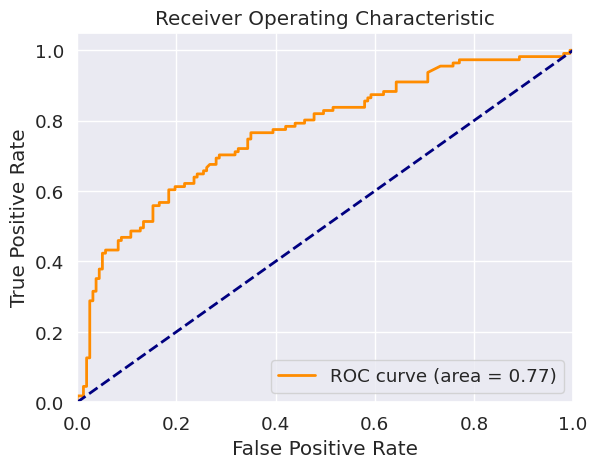

ROC AUC: 0.7690652435875365


In [61]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("ROC AUC:", roc_auc)


# Task 7

In [60]:

X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Define the probability thresholds
thresholds = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]

# Evaluate the model at different thresholds
for threshold in thresholds:
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate precision, recall, accuracy, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Threshold: {threshold}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\n")


Threshold: 0.01
Confusion Matrix:
[[  0 157]
 [  0 111]]
Precision: 0.4142
Recall: 1.0000
Accuracy: 0.4142
F1 Score: 0.5858


Threshold: 0.1
Confusion Matrix:
[[  2 155]
 [  1 110]]
Precision: 0.4151
Recall: 0.9910
Accuracy: 0.4179
F1 Score: 0.5851


Threshold: 0.2
Confusion Matrix:
[[ 16 141]
 [  2 109]]
Precision: 0.4360
Recall: 0.9820
Accuracy: 0.4664
F1 Score: 0.6039


Threshold: 0.3
Confusion Matrix:
[[95 62]
 [25 86]]
Precision: 0.5811
Recall: 0.7748
Accuracy: 0.6754
F1 Score: 0.6641


Threshold: 0.4
Confusion Matrix:
[[125  32]
 [ 43  68]]
Precision: 0.6800
Recall: 0.6126
Accuracy: 0.7201
F1 Score: 0.6445


Threshold: 0.5
Confusion Matrix:
[[143  14]
 [ 59  52]]
Precision: 0.7879
Recall: 0.4685
Accuracy: 0.7276
F1 Score: 0.5876




The confusion matrix changes with different thresholds because it defines how we classify predictions into true positives, true negatives, false positives, and false negatives based on the chosen threshold.



While ROC AUC is informative for assessing model performance, examining precision, recall, accuracy, and F1 score at different thresholds allows you to tailor the model's behavior to the specific requirements of your application. It helps understand how the model performs in different scenarios and make informed decisions about its practical utility.`